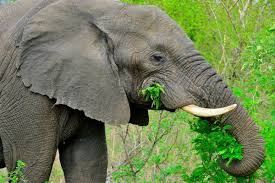

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/voi.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

rows,cols = img.shape[:2]

cv2_imshow(img)

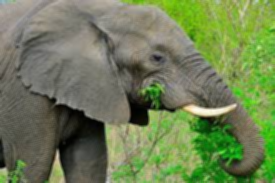

In [3]:
kernel_3x3 = np.ones((3,3),np.float32) / 9.0
output1=cv2.filter2D(img,-1,kernel_3x3)
cv2_imshow(output1)

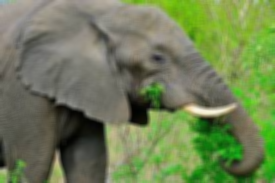

In [4]:
kernel_5x5 = np.ones((5,5),np.float32) / 25.0
output2=cv2.filter2D(img,-1,kernel_5x5)
cv2_imshow(output2)

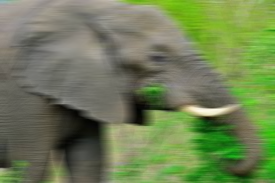

In [5]:
size=15
kernel_motion_blur = np.zeros((size,size))
kernel_motion_blur[int((size-1)/2),:] = np.ones(size)
kernel_motion_blur = kernel_motion_blur /  size
output3=cv2.filter2D(img,-1,kernel_motion_blur)
cv2_imshow(output3)

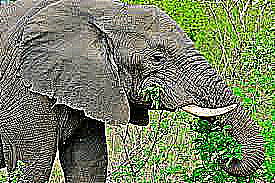

In [6]:
kernel_sharpen_1 = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
output4=cv2.filter2D(img,-1,kernel_sharpen_1)
cv2_imshow(output4)

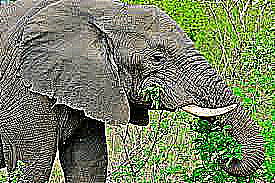

In [7]:
kernel_sharpen_2 = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
output5=cv2.filter2D(img,-1,kernel_sharpen_2)
cv2_imshow(output5)

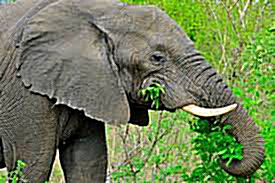

In [8]:
kernel_sharpen_3 = np.array([[-1,-1,-1,-1,-1],[-1,2,2,2,-1],[-1,2,8,2,-1],[-1,2,2,2,-1],[-1,-1,-1,-1,-1]])/8.0
output6=cv2.filter2D(img,-1,kernel_sharpen_3)
cv2_imshow(output6)

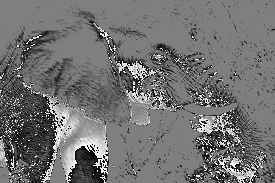

In [9]:
kernel_emboss1=np.array([[0,-1,1],[1,0,-1],[1,1,0]])
output7=cv2.filter2D(gray,-1,kernel_emboss1)+128
cv2_imshow(output7)

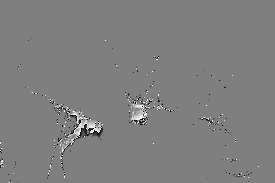

In [10]:
kernel_emboss2=np.array([[-1,-1,0],[-1,0,11],[0,1,1]])
output8=cv2.filter2D(gray,-1,kernel_emboss2)+128
cv2_imshow(output8)

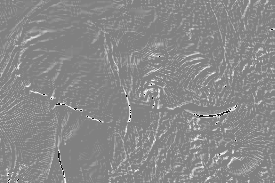

In [11]:
kernel_emboss3=np.array([[1,0,0],[0,0,0],[0,0,-1]])
output9=cv2.filter2D(gray,-1,kernel_emboss3)+128
cv2_imshow(output9)

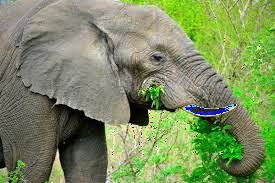

In [12]:
kernel_gauss_x= cv2.getGaussianKernel(cols,200)
kernel_gauss_y = cv2.getGaussianKernel(rows,200)
kernel = kernel_gauss_y * kernel_gauss_x.T
mask=255*kernel/np.linalg.norm(kernel)
output10=np.copy(img)
for i in range(3):
  output10[:,:,i]=output10[:,:,i] * mask
cv2_imshow(output10)


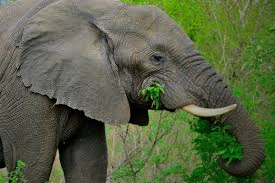

In [13]:
kernel_gauss_x= cv2.getGaussianKernel(int(1.5*cols),200)
kernel_gauss_y = cv2.getGaussianKernel(int(1.5*rows),200)
kernel = kernel_gauss_y * kernel_gauss_x.T
mask=255*kernel/np.linalg.norm(kernel)
mask = mask[int(0.5*rows):,int(0.5*cols):]
output11=np.copy(img)
for i in range(3):
  output11[:,:,i]=output11[:,:,i] * mask
cv2_imshow(output11)

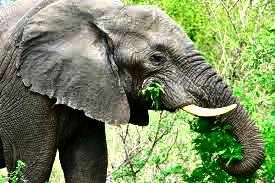

-1

In [14]:
img_yuv=cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
img_yuv[:,:,0]=cv2.equalizeHist(img_yuv[:,:,0])
output12=cv2.cvtColor(img_yuv,cv2.COLOR_YUV2BGR)
cv2_imshow(output12)

cv2.waitKey(0)